# Exploring NLP with random forest algorithm 


$\text{Helping Computers analyze text easily i.e detect spam emails, autocorrect}$

$\text{NLP is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language}$

$\text{Examples of NLP in real life}$


- information retrival 
- Information extraction (Gmails structures events from emails)
- Machine translation (e.g language )
- Text simplification 
- Sentiment analysis 
- Spam filter 
- Auto-predict
- Auto correct 
- Speech recognition 
- Question answering 
- NL generaton 


In [1]:
#Installing natural language processing tool kit 
!pip install nltk

In [151]:
import nltk
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import string 
import re
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
#nltk.download()

# Reading and exploring our dataset 

In [3]:
import pandas as pd 


In [4]:
#!wget https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv
#!wget https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/blob/master/spam.csv 

In [5]:
data = pd.read_csv('spam.csv',engine = 'python')

In [6]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
header = ['Labels', 'text']
data= data.rename(columns = {"v1":"Labels", "v2": "Text"})

In [9]:
data.head()

,Labels,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data['Labels'].value_counts()

ham     4825
spam     747
Name: Labels, dtype: int64

# Pre-processing our data 

In [11]:
#removing punctuations
def remove_punct(text):
    text_nopunct = "".join ([char for char in text if char not in string.punctuation])
    return text_nopunct

In [12]:
data['Clean_text'] = data['Text'].apply(lambda x:remove_punct(x))

In [13]:
remove_punct('who am@ i#')

'who am i'

In [14]:
data.head()

,Labels,Text,Clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [15]:
#tockenizing the data 
def tokenize(text):
    tockens = re.split('\W+',text)
    return tockens

data['tocknized']=data['Clean_text'].apply(lambda x: tokenize(x.lower()))


In [16]:
# remove stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stopword = nltk.corpus.stopwords.words('english')

In [18]:
def rm_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text
data['text_nonstop'] = data['tocknized'].apply(lambda x: rm_stopwords(x))

In [19]:
data.head()

,Labels,Text,Clean_text,tocknized,text_nonstop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [20]:
#Stemming 
ps = nltk.PorterStemmer()
def stemming(tockenized_text):
    text = [ps.stem(word) for word in tockenized_text]
    return text 
data['text_stem'] = data['text_nonstop'].apply(lambda x: stemming(x))
data.head()

,Labels,Text,Clean_text,tocknized,text_nonstop,text_stem
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [21]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemm(tockenized_text):
    text = [wn.lemmatize(word) for word in tockenized_text]
    return text

data['text_lemm'] = data ['text_stem'].apply(lambda x: lemm(x))
data.head()

[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Labels,Text,Clean_text,tocknized,text_nonstop,text_stem,text_lemm
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, goe, usf, live, around, tho..."


# Feature engeneering 


In [22]:
"""Feature engineering is the process of using domain knowledge of
the data to create features that make machine learning algorithms work.
In our case we will first look at simple features between spam and ham, 
like message length and punctuations"""

'Feature engineering is the process of using domain knowledge of\nthe data to create features that make machine learning algorithms work.\nIn our case we will first look at simple features between spam and ham, \nlike message length and punctuations'

In [23]:
#calculate length of text 
data['body_len'] = data['Text'].apply(lambda x: len(x)-x.count(" "))
data.head()

,Labels,Text,Clean_text,tocknized,text_nonstop,text_stem,text_lemm,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre...",92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]",24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",39
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, goe, usf, live, around, tho...",49


In [24]:
#count punctuations 
def count_punc(text):
    count = sum ([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")), 3)*100

data['punch%'] = data['Text'].apply(lambda x: count_punc(x))
data.head()

,Labels,Text,Clean_text,tocknized,text_nonstop,text_stem,text_lemm,body_len,punch%
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre...",92,9.8
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]",24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128,4.7
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, goe, usf, live, around, tho...",49,4.1


In [25]:
#Plot histogram and compare the two
bins = np.linspace(0,200,40)

In [26]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


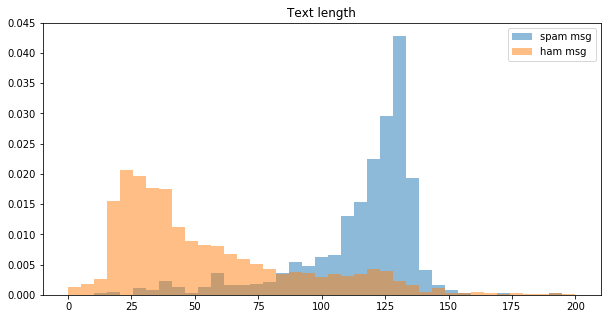

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


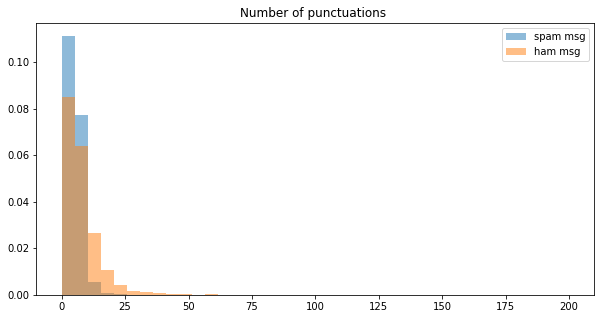

In [27]:
plt.figure(figsize=(10,5))
plt.hist(data[data['Labels']=='spam']['body_len'],bins,alpha = 0.5, normed= True, label='spam msg')
plt.hist(data[data['Labels']=='ham']['body_len'],bins,alpha = 0.5, normed= True, label='ham msg')
plt.legend(loc='upper right')
plt.title('Text length')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(data[data['Labels']=='spam']['punch%'],bins,alpha = 0.5, normed= True, label='spam msg')
plt.hist(data[data['Labels']=='ham']['punch%'],bins,alpha = 0.5, normed= True, label='ham msg')
plt.legend(loc='upper right')
plt.title('Number of punctuations ')
plt.show()

- Spam has high number of words and punctuations compared to hams. sp this is a good feauture to use.

# Split into train/test 

In [91]:
X = data[['Text','body_len', 'punch%']]
y = data['Labels']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

# Vectorize text 

In [92]:
#Finally we are vectorizing 
"""Vectorizing is the process of encoding text as integers in order to create feauture vectors so that ML algorithm """
#reduce the number of commont words (this it, then, is)
tfidf_vect = TfidfVectorizer(analyzer=remove_punct)

In [93]:
tfidf_vect_fit = tfidf_vect.fit(X_train['Text'])

In [94]:
tfidf_train = tfidf_vect_fit.transform(X_train['Text'])
tfidf_test = tfidf_vect_fit.transform(X_test['Text'])

In [95]:
X_train_vect = pd.concat([X_train[['body_len', 'punch%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punch%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)


In [96]:

X_train_vect.head()

,body_len,punch%,0,1,2,3,4,5,6,7,...,59,60,61,62,63,64,65,66,67,68
0,65,9.2,0.0,0.684714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.100321,0.0,0.0,0.0,0.0,0.0,0.0
1,116,20.7,0.0,0.482620,0.281039,0.000000,0.000000,0.075535,0.000000,0.073845,...,0.000000,0.000000,0.000000,0.060609,0.0,0.0,0.0,0.0,0.0,0.0
2,38,2.6,0.0,0.543011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133289,0.000000,0.000000,0.089504,0.0,0.0,0.0,0.0,0.0,0.0
3,38,15.8,0.0,0.594471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.195972,0.0,0.0,0.0,0.0,0.0,0.0
4,128,7.0,0.0,0.348186,0.585456,0.158474,0.146724,0.343318,0.216328,0.111878,...,0.000000,0.025183,0.049324,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Building a simple machine learning classifier. 

In [114]:
rf = RandomForestClassifier()

# GridSearchCV

In [98]:
param = {'n_estimators': np.arange(10,300,90),'max_depth': np.arange(20,100,40)}
gridsearch = GridSearchCV(rf, param,cv=10, n_jobs = -1)
rf_fit = gridsearch.fit (X_train_vect,y_train) 
pd.DataFrame(rf_fit.cv_results_).sort_values('mean_test_score', ascending = False).head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
5,2.406548,0.037604,0.981153,0.999975,60,100,"{'max_depth': 60, 'n_estimators': 100}",1,0.982063,1.0,...,0.970787,1.0,0.997753,0.999751,0.968539,1.0,0.168175,0.008174,0.008355,0.000075
2,4.642810,0.058186,0.980705,1.000000,20,190,"{'max_depth': 20, 'n_estimators': 190}",2,0.979821,1.0,...,0.970787,1.0,0.995506,1.000000,0.970787,1.0,0.192434,0.012588,0.007394,0.000000
3,7.103175,0.101543,0.980256,1.000000,20,280,"{'max_depth': 20, 'n_estimators': 280}",3,0.979821,1.0,...,0.970787,1.0,0.993258,1.000000,0.964045,1.0,0.297629,0.013075,0.008273,0.000000
6,4.567489,0.065160,0.980256,1.000000,60,190,"{'max_depth': 60, 'n_estimators': 190}",3,0.979821,1.0,...,0.970787,1.0,0.997753,1.000000,0.966292,1.0,0.184845,0.011058,0.008628,0.000000
1,2.599121,0.030883,0.980031,1.000000,20,100,"{'max_depth': 20, 'n_estimators': 100}",5,0.977578,1.0,...,0.968539,1.0,0.995506,1.000000,0.968539,1.0,0.252818,0.008543,0.008126,0.000000


In [99]:
rf_fit_pred = rf_fit.predict(X_test_vect)

In [159]:
print (metrics.classification_report(y_test, rf_fit_pred))
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, rf_fit_pred), 3))

             precision    recall  f1-score   support

        ham       0.99      1.00      0.99       965
       spam       0.99      0.92      0.95       150

avg / total       0.99      0.99      0.99      1115

Overall Accuracy: 0.987


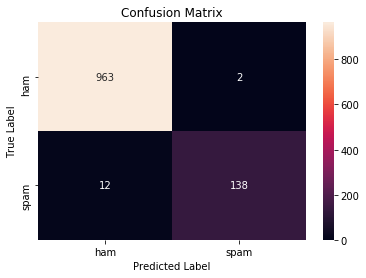

In [101]:
cm = confusion_matrix(y_test, rf_fit_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- Random Forest gives an accuracy of 98.7%. High-value F1-score is also obtained from the model. Confusion Matrix tells us that 
- we correctly predicted 964 hams and 136 spams.1 hams were incorrectly -- identified as spams and 14 spams 
- were incorrectly predicted as hams. Detecting spams as hams are justifiable as compared to hams as spams.

- TP – True positive rate: The number of samples correctly marked as positive
- FN – False negative rate: The number of samples incorrectly marked as negative (aka type 2 error)
- FP – False positive rate: The number of samples incorrectly marked as positive (aka type 1 error)
- TN – True negative rate: The number of samples correctly marked as negative

- Reference:  https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b


# Exploring better parameters 

In [135]:

bes_param = rf_fit.best_params_

In [136]:
bes_param

{'max_depth': 60, 'n_estimators': 100}

In [137]:
best_n_estim      = rf_fit.best_params_['n_estimators']
best_max_depth = rf_fit.best_params_['max_depth']  


In [139]:
rf2 = RandomForestClassifier(n_estimators=best_n_estim,
                            max_depth=best_max_depth)

In [146]:
fit = rf2.fit(X_train_vect,y_train)


In [147]:
pred = fit.predict(X_test_vect)

In [160]:
print (metrics.classification_report(y_test,pred))
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, pred), 3))

             precision    recall  f1-score   support

        ham       0.99      1.00      0.99       965
       spam       0.99      0.93      0.96       150

avg / total       0.99      0.99      0.99      1115

Overall Accuracy: 0.989


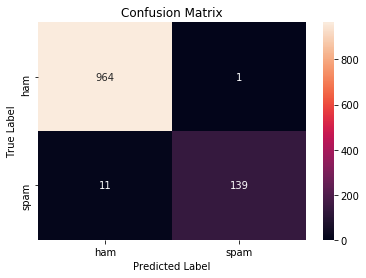

In [161]:
cm = confusion_matrix(y_test, pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()